# Taller 3 - Métodos computacionales
### Integrantes: 
    - Gabriel Ardila
    - Olga Londoño

In [14]:
# LIBRERIAS
import numpy as np
import sympy as sp
import scipy as sc
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import rc
import scipy as sc
from scipy.interpolate import lagrange
import sympy as sym
from sympy import *
from sympy import Symbol, N
import urllib.request
import pandas as pd
import math
from sympy import symbols, integrate, legendre, S

### Ejercicios: Álgebra lineal

Problemas: 3,4,5,6,7,9,10,12,13,14,15




In [5]:
def matmul(A,B):
    result=np.zeros((len(A),len(B[0])))
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]

    return result
           

A=[[1,0,0],[5,1,0],[-2,3,1]]
B=[[4,-2,1],[0,3,7],[0,0,2]]

matmul(A,B)


array([[ 4., -2.,  1.],
       [20., -7., 12.],
       [-8., 13., 21.]])



Primero, se puede definir una matriz aumentada $A'$ que incluye la matriz de coeficientes $A$ y el vector de términos independientes $\vec{b}$:

\begin{equation*}
A' =
\begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1n} & b_1 \\
0 & a_{22} & \cdots & a_{2n} & b_2 \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & \cdots & a_{nn} & b_n
\end{pmatrix}
\end{equation*}

Luego, se puede comenzar por encontrar el valor de $x_n$ mediante la ecuación $a_{nn}x_n = b_n$, lo que da como resultado:

\begin{equation*}
x_n = \frac{b_n}{a_{nn}}
\end{equation*}

A continuación, se puede utilizar este valor para despejar $x_{n-1}$ a partir de la ecuación $a_{n-1,n-1}x_{n-1} + a_{n-1,n}x_n = b_{n-1}$:

\begin{equation*}
x_{n-1} = \frac{b_{n-1} - a_{n-1,n}x_n}{a_{n-1,n-1}}
\end{equation*}

Este proceso puede continuar hacia atrás hasta llegar al valor de $x_1$, que se puede encontrar a partir de la ecuación $a_{11}x_1 = b_1$:

\begin{equation*}
x_1 = \frac{b_1}{a_{11}}
\end{equation*}

En general, la fórmula de sustitución hacia atrás se puede expresar de la siguiente manera:

\begin{equation*}
x_i = \frac{1}{a_{ii}} \left( b_i - \sum_{j=i+1}^n a_{ij} x_j \right), \qquad i = n, n-1, \ldots, 1
\end{equation*}

Esta fórmula permite encontrar los valores de la solución del sistema de ecuaciones lineales a partir de la matriz aumentada $A'$.



\begin{equation}
x_i = \frac{1}{a_{ii}} \left( b_i - \sum_{j=i+1}^{n} a_{ij}x_j \right),\quad i=n-1,n-2,...,1
\end{equation}

donde $x_i$ es la solución del sistema en la i-ésima incógnita, $a_{ij}$ es el coeficiente de la i-ésima ecuación en la j-ésima incógnita y $b_i$ es el término independiente de la i-ésima ecuación. 


\begin{pmatrix}
 3x& -y & -z & | & 1 \\
-x & 3y & z & | & 3 \\
2x & y & 4z & | & 7 \\
\end{pmatrix}

In [6]:
A = np.array([[3, -1, -1], [-1, 3, 1], [2, 1, 4]])
b = np.array([1, 3, 7])

x0 = np.zeros_like(b)
omega = 1.5

tolerance = 1e-6
max_iterations = 1000

def SOR(A, b, x0, omega, tolerance, max_iterations):
    x = x0.copy()
    iter_count = 0
    convergence = False
    while (not convergence) and (iter_count < max_iterations):
        iter_count += 1
        for i in range(len(x)):
            old_x_i = x[i]
            x[i] = (1 - omega) * x[i] + (omega / A[i, i]) * (b[i] - np.dot(A[i, :i], x[:i]) - np.dot(A[i, i+1:], x[i+1:]))
            if abs(x[i] - old_x_i) < tolerance:
                convergence = True
    return x, iter_count



omegas = np.linspace(1, 2, 100)
iter_counts = []
answers=[]
for omega in omegas:
    x, iter_count = SOR(A, b, x0, omega, tolerance, max_iterations)
    iter_counts.append(iter_count)
    answers.append(x)
omega_min = omegas[np.argmin(iter_counts)]
answer_fin=answers[iter_counts.index(omega_min)]
print(answer_fin)
print("El parámetrod e relejación que miniminza las iteraciones es: ", omega_min)





[0 1 1]
El parámetrod e relejación que miniminza las iteraciones es:  1.0


In [7]:


A = np.array([[4, -2, 1], [20, -7, 12], [-8, 13, 17]])

n = len(A)
L = np.zeros((n, n))
U = np.zeros((n, n))

for i in range(n):
    L[i, i] = 1

U[0, :] = A[0, :]

for j in range(n):
    L[j, 0] = A[j, 0] / U[0, 0]
    U[0, j] = A[0, j] / L[0, 0]

for i in range(1, n):
    for j in range(i, n):
        U[i, j] = A[i, j] - np.dot(L[i, :i], U[:i, j])
        L[j, i] = (A[j, i] - np.dot(L[j, :i], U[:i, i])) / U[i, i]


print("L = ", L)
print("U = ", U)




L =  [[ 1.  0.  0.]
 [ 5.  1.  0.]
 [-2.  3.  1.]]
U =  [[ 4. -2.  1.]
 [ 0.  3.  7.]
 [ 0.  0. -2.]]


In [8]:
def jacobi_method(A, tol=1e-10, max_iter=10000):
    n = len(A)
    V = np.identity(n)
    iters = 0
    while True:
        iters += 1
        max_off_diag = np.max(np.abs(np.triu(A, k=1)))
        if max_off_diag < tol or iters > max_iter:
            break
        for i in range(n):
            for j in range(i + 1, n):
                if np.abs(A[i, j]) == max_off_diag:
                    phi = 0.5 * np.arctan2(2 * A[i, j], A[j, j] - A[i, i])
                    c = np.cos(phi)
                    s = np.sin(phi)
                    G = np.identity(n)
                    G[i, i] = c
                    G[j, j] = c
                    G[i, j] = s
                    G[j, i] = -s
                    A = G.T @ A @ G
                    V = V @ G
    eigen_values = np.diag(A)
    eigen_vectors = V
    return eigen_values, eigen_vectors

A = np.array([[4, 1, 1],
              [1, 3, 2],
              [1, 2, 3]])
eigen_values, eigen_vectors = jacobi_method(A)

print(eigen_values)
print("\n", eigen_vectors)


print(np.linalg.eig(A))

[3. 1. 6.]

 [[ 0.81649658  0.          0.57735027]
 [-0.40824829  0.70710678  0.57735027]
 [-0.40824829 -0.70710678  0.57735027]]
(array([3., 6., 1.]), array([[-8.16496581e-01,  5.77350269e-01,  3.14018492e-17],
       [ 4.08248290e-01,  5.77350269e-01, -7.07106781e-01],
       [ 4.08248290e-01,  5.77350269e-01,  7.07106781e-01]]))


Los valores propios son los mismo pero hay epqueñas diferencias en el resultado de los vectores propios.

In [9]:

from scipy.linalg import lu_factor, lu_solve

H = np.array([[1, 2, -1],
              [1, 0, 1],
              [4, -4, 5]])

def inverse_power_method(A, tol=1e-8, max_iter=1000):
    L, U = lu_factor(A)

    x = np.ones(A.shape[0])
    x = x / np.linalg.norm(x)
    lamb = 0


    for i in range(max_iter):
        y = lu_solve(( L, U), x)

        lamb_prev = lamb
        lamb = np.dot(x, y)

        x = y / np.linalg.norm(y)

        if abs(lamb - lamb_prev) < tol:
            break

    return lamb, x

lamb, x = inverse_power_method(H)
print("Valor propio:", lamb)
print("Vector propio:", x)





Valor propio: 1.0000000091061194
Vector propio: [-0.40824829  0.40824829  0.81649658]


In [10]:


def jacobian(f, x0, h=1e-4):
    
    n = len(x0)
    m = len(f(x0))
    J = np.zeros((m, n))
    
    for i in range(n):
        x = np.copy(x0)
        x[i] += h
        
        J[:, i] = (-1/12*f(x - 2*h) + 2/3*f(x - h) - 2/3*f(x + h) + 1/12*f(x + 2*h))/h
    
    return J

def func(x):
    f1 = 6*x[0] - 2*np.cos(x[1]*x[2]) - 1
    f2 = 9*x[1] + np.sqrt(x[0]**2 + np.sin(x[2]) + 1.06) + 0.9
    f3 = 60*x[2] + 3*np.exp(-x[0]*x[1]) + 10*np.pi - 3
    return np.array([f1, f2, f3])

x = np.array([0.5, 0.5, 0.5])
J = jacobian(func, x, h=0.01)
print(J)



def jacobian(f, x, h):
    n = len(x)
    J = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            xplus = np.array(x)
            xplus[j] += h
            fplus = f(xplus)
            xminus = np.array(x)
            xminus[j] -= h
            fminus = f(xminus)
            J[i, j] = (fplus[i] - fminus[i]) / (2*h)
    return J

def f(x):
    f1 = 6*x[0] - 2*np.cos(x[1]*x[2]) - 1
    f2 = 9*x[1] + np.sqrt(x[0]**2 + np.sin(x[2]) + 1.06) + 0.9
    f3 = 60*x[2] + 3*np.exp(-x[0]*x[1]) + 10*np.pi - 3
    return np.array([f1, f2, f3])

x = np.array([0.5, 0.5, 0.5])
h1 = 0.01
J1 = jacobian(f, x, h1)
print("Jacobian with h = 0.01:\n", J1)

h2 = np.sqrt(np.finfo(float).eps)
J2 = jacobian(f, x, h2)
print("Jacobian with h = {:.16f}:\n".format(h2), J2)


[[ -6.49480794  -6.50953575  -6.50953575]
 [ -9.70728049  -9.70179817  -9.69828432]
 [-57.65200304 -57.65200304 -57.66359768]]
Jacobian with h = 0.01:
 [[ 6.          0.24740293  0.24740293]
 [ 0.37376854  9.          0.32801836]
 [-1.16820604 -1.16820604 60.        ]]
Jacobian with h = 0.0000000149011612:
 [[ 6.          0.24740396  0.24740396]
 [ 0.37377754  9.          0.32802063]
 [-1.16820121 -1.16820121 60.        ]]


In [11]:

J1 = np.array([[0, 0, 0], [0, 0, -1], [0, 1, 0]])
J2 = np.array([[0, 0, 1], [0, 0, 0], [-1, 0, 0]])
J3 = np.array([[0, -1, 0], [1, 0, 0], [0, 0, 0]])

for i in range(3):
    for j in range(i+1, 3):
        commutator = np.dot(J1, J2) - np.dot(J2, J1)
        x= np.allclose(commutator, J3)

        commutator = np.dot(J2, J3) - np.dot(J3, J2)
        y= np.allclose(commutator, J1)

        commutator = np.dot(J3, J1) - np.dot(J1, J3)
        z= np.allclose(commutator, J2)

print(x,y,z)



True True True


In [12]:
sigma1 = sp.Matrix([[0, 1], [1, 0]])
sigma2 = sp.Matrix([[0, -sp.I], [sp.I, 0]])
sigma3 = sp.Matrix([[1, 0], [0, -1]])

commutator = sigma1 * sigma2 - sigma2 * sigma1

print(commutator)

Matrix([[2*I, 0], [0, -2*I]])


El resultado es Matrix([[2*I, 0], [0, -2*I]]) lo que puede simplificarse a 2 * sp.I * sigma3 lo que cumple la relación [σi, σj] = 2i pertenece a ijk σk

In [13]:
import sympy as sp
eta = sp.diag(1, -1, -1, -1)
gamma0 = sp.Matrix([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, -1, 0], [0, 0, 0, -1]])
gamma1 = sp.Matrix([[0, 0, 0, 1], [0, 0, 1, 0], [0, -1, 0, 0], [-1, 0, 0, 0]])
gamma2 = sp.Matrix([[0, 0, 0, -sp.I], [0, 0, sp.I, 0], [0, sp.I, 0, 0], [-sp.I, 0, 0, 0]])
gamma3 = sp.Matrix([[0, 0, 1, 0], [0, 0, 0, -1], [-1, 0, 0, 0], [0, 1, 0, 0]])
def anticommutator(a, b):
    return a * b + b * a
def anticommutator_gamma(mu, nu):
    return anticommutator(globals()["gamma" + str(mu)], globals()["gamma" + str(nu)])
for mu in range(4):
    for nu in range(mu):
        x= anticommutator_gamma(mu, nu) == 2 * eta[mu, nu] * sp.eye(4)

print(x)

True


### Ejercicios: Mínimos Cuadrados

Problemas: 1,6,7

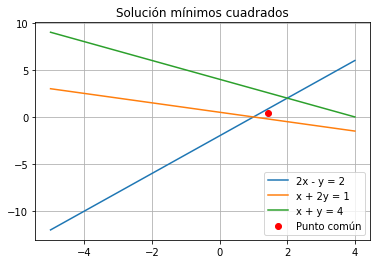

In [16]:
# (1)
def f_1(x):
    return (2*x)-2

def f_2(x):
    return ((-1/2)*x)+(1/2)

def f_3(x):
    return (-x)+4
    
A = np.array([[2, -1], [1, 2], [1, 1]])
B = np.array([[2], [1], [4]])
A_pinv = np.linalg.pinv(A)
vector_x = A_pinv@B


x = np.arange(-5, 5)

y1 = 2*x - 2
y2 = (1 - x) / 2
y3 = 4 - x

plt.plot(x, y1, label='2x - y = 2')
plt.plot(x, y2, label='x + 2y = 1')
plt.plot(x, y3, label='x + y = 4')
plt.title("Solución mínimos cuadrados")
plt.scatter(vector_x[0], vector_x[1], color='red', label='Punto común')
plt.legend()
plt.grid()
plt.show()



def encontrar_minimo_cuadrado():
    menor = 10
    X = np.linspace(-5,5,500)
    Y = np.linspace(-5,5,500)
    for x in X:
        for y in Y:
            y_1 = f_1(x)
            y_2 = f_2(x)
            y_3 = f_3(x)
            menor_1 = (y_1-y)**2 + (y_2-y)**2 + (y_3-y)**2
            print(menor_1,x,y)
            
            if menor_1 < menor:
                menor = menor_1
                x_fin = x
                y_fin = y
    return x_fin,y_fin
            

In [ ]:
# (6) en pdf

In [ ]:
# (7)